# Simulated Annealing Data

In [1]:
import time
import random
import numpy as np
from random import shuffle
from random import randrange

def calculateNumberOfConflicts(position):
    """
    returns number of conflicts
    """
    numberOfConflicts = 0  # initialize as 0

    for i in range(0, len(position)):
        for j in range(i + 1, len(position)):
            if position[i] == position[j]:
                numberOfConflicts += 1  # increment if horizontal conflict
            elif abs(i - j) == abs(position[i] - position[j]):
                numberOfConflicts += 1  # increment if diagonal conflict

    return numberOfConflicts


def bestNeighbor(position):
    """
    returns the best neighbor - shd be best neighbor
    """
    # define current position's number of conflict as the min number of conflict
    min_numberOfConflicts = calculateNumberOfConflicts(position)

    # define best position as current position
    best_position = position
    for i in range(0, len(position)):
        for j in range(0, len(position)):
            if j != position[i]:
                temp = position.copy()
                temp[i] = j
                temp_numberOfConflicts = calculateNumberOfConflicts(temp)
                if temp_numberOfConflicts <= min_numberOfConflicts:
                    min_numberOfConflicts = temp_numberOfConflicts
                    best_position = temp
    return best_position

def randomNeighbor(position):
    """
    returns a random neighbor which is better than the current position
    """
    #add your solution
    possible_neighbors = []
    currentConflicts = calculateNumberOfConflicts(position)

    # define best position as current position, find all possible neighbors 
    # from current state and choose randomly among them
    neighbor = position
    for i in range(0, len(position)):
        for j in range(0, len(position)):
            if j != position[i]:
                temp = position.copy()
                temp[i] = j
                temp_numberOfConflicts = calculateNumberOfConflicts(temp)
                # if neighbor is better than current add to list
                if temp_numberOfConflicts < currentConflicts:
                    possible_neighbors.append(temp)

    # if there are better neighbor selects randomly and returns
    # if not, returns the current pposition
    if len(possible_neighbors) != 0:
      neighbor = random.choice(possible_neighbors)

    return neighbor

def printSolutionT(position):
    N = len(position)

    for i in range(N):
        row = ""
        for j in range(N):
            if position[i] == j:
                row += "X "
            else:
                row += "O "
        print(row)


In [2]:
def NQueen(N, randomRestart=True, stochastic=False, upperBound=np.inf):
    if N in [2, 3]:
        raise ValueError("Failure, no solution exists for given N.")

    solved = False
    current_position = list(np.zeros(N))
    count = 0
    while (calculateNumberOfConflicts(current_position) > 0) and count < upperBound:
        # set an random initial position with N queen.
        # if position[k] = j, then there exist a queen at k,j
        # notice that this representation is indeed compact and suitable.
        initial_position = [randrange(N) for _ in range(N)]
        current_position = initial_position
        while True:        
            if stochastic:
                #add your solution
                neighbor = randomNeighbor(current_position)
            else:
                neighbor = bestNeighbor(current_position)

            if calculateNumberOfConflicts(neighbor) >= calculateNumberOfConflicts(
                current_position
            ):
                if randomRestart:
                    break # if no better neighbour, initialize a random position
                else:
                    if calculateNumberOfConflicts(current_position) != 0:
                        #print("Failure, no solution found.") !!!!!!!!!!
                        #printSolutionT(initial_position) !!!!!!!!!!!!
                        return solved, count
                    else:
                        #printSolutionT(current_position) !!!!!!!!!
                        return True, count
            
            # better placement is found, update current position
            current_position = neighbor 
        count += 1

    if randomRestart:
      pass
      # print("restart count:", count) !!!!!!!!

    if count >= upperBound:
      pass
        # print("Failure, no solution found.") !!!!!!!!
        #{printSolutionT(initial_position)}
    else:
        #printSolutionT(current_position) !!!!!!!!!!!!
        solved = True

    return solved, count


# MyCode

In [34]:
import math
from matplotlib import pyplot as plt 

In [89]:
def simulatedAnnealing(position, T):
  current = position
  #T = 10000
  annealingRate = 0.9

  while T > 1:
    currentConflicts = calculateNumberOfConflicts(current)    
    if currentConflicts == 0:
      return current, True 

    next = randomNeighbor(current)
    deltaE = calculateNumberOfConflicts(next) - currentConflicts

    if deltaE < 0:
      current = next
    else:
      acceptProbability = min(math.exp(deltaE / T), 1)
      if random.random() <= acceptProbability:
        current = next

    T *= annealingRate

  if calculateNumberOfConflicts(current) == 0:
    return current, True
  else:
    #print("Failure, no solution found.")
    return position, False

[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
[0.0, 2.0, 5.0, 9.0, 4.0, 12.0, 8.0, 6.0, 4.0]
Total elapsed time: 136.6270546913147.


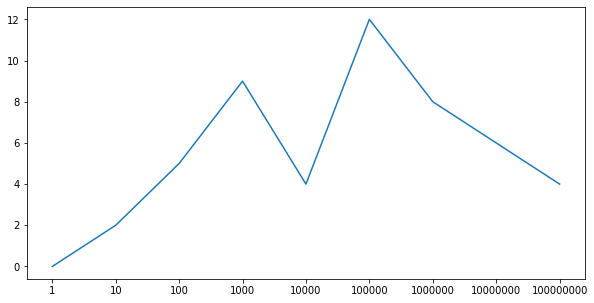

In [90]:
N = 10
e_num = 100

T_values = []
success_rates = []

s = time.time()
for  i in range(9):
  temp = 10 ** i
  success = []
  for j in range(e_num):
    initial_position = [randrange(N) for _ in range(N)]
    solution, result = simulatedAnnealing(initial_position, temp)
    success.append(result)

  avg_percentage = 0
  if len(success) != 0:
    avg_percentage = (success.count(True) / len(success)) * 100
  
  success_rates.append(avg_percentage)
  T_values.append(temp)

f = time.time()

print(T_values)
print(success_rates)
print(f"Total elapsed time: {f - s}.")

x = range(len(T_values))
fs = (10, 5)
fig = plt.figure(figsize=fs)
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, success_rates)
plt.xticks(x, T_values)

plt.show()

Success rates for different values of annealing rate: 

* for 0.9 -> max success rate 12% when T = 10^5
* for 0.8 -> max success rate 9% when T = 10^8
* for 0.7 -> max success rate 9% when T = 10^8
* for 0.6 -> max success rate 8% when T = 10^2
* for 0.5 -> max success rate 9% when T = 10^7
* for 0.4 -> max success rate 7% when T = 10^8
* for 0.3 -> max success rate 7% when T = 10^7
* for 0.2 -> max success rate 7% when T = 10^7
* for 0.1 -> max success rate 7% when T = 10^7 and T = 10^8

In [92]:
N = 10 # num of queens
e_num = 100 # experimentation number

run_times = list(np.zeros(e_num)) # list storing the run times of each experiment
success = list(np.zeros(e_num)) # list storing if the experiment is successful or not
iteration_num = list(np.zeros(e_num)) # list storing the num of random restart in each experiment

print("Data for simulated annealing with N = " + str(N) + ": ")

s = time.time()
for i in range(e_num):
  start = time.time()
  initial_position = [randrange(N) for _ in range(N)]
  solution, success[i] = simulatedAnnealing(initial_position, 100000)
  end = time.time()
  run_times[i] = end - start
  
f = time.time()

avg_time = np.mean(run_times)

print(f"Total elapsed time: {f - s}.")
print(run_times)
print(success)

print("\n")
print("Percentage of success: " + str(success.count(True)) + "%")
print("Elapsed time to complete experiments on average: " + str(avg_time))

Data for simulated annealing with N = 10: 
Total elapsed time: 19.361036777496338.
[0.21001863479614258, 0.20974206924438477, 0.20692944526672363, 0.19699645042419434, 0.20906543731689453, 0.20102190971374512, 0.21402406692504883, 0.21014976501464844, 0.20916128158569336, 0.20081496238708496, 0.20392513275146484, 0.2095937728881836, 0.20403122901916504, 0.2027275562286377, 0.19602704048156738, 0.016022920608520508, 0.2073380947113037, 0.20552349090576172, 0.2077796459197998, 0.19954824447631836, 0.20802044868469238, 0.2078993320465088, 0.20543909072875977, 0.19980597496032715, 0.19620704650878906, 0.20124173164367676, 0.22242212295532227, 0.2022266387939453, 0.20980191230773926, 0.2062675952911377, 0.20921802520751953, 0.19583582878112793, 0.2046830654144287, 0.1999664306640625, 0.2021493911743164, 0.21755385398864746, 0.20286846160888672, 0.20850157737731934, 0.2062525749206543, 0.19704198837280273, 0.21019673347473145, 0.1985938549041748, 0.20837855339050293, 0.19987750053405762, 0.2

In [94]:
N = 20 # num of queens
e_num = 100 # experimentation number

run_times = list(np.zeros(e_num)) # list storing the run times of each experiment
success = list(np.zeros(e_num)) # list storing if the experiment is successful or not
iteration_num = list(np.zeros(e_num)) # list storing the num of random restart in each experiment

print("Data for simulated annealing with N = " + str(N) + ": ")

s = time.time()
for i in range(e_num):
  start = time.time()
  initial_position = [randrange(N) for _ in range(N)]
  solution, success[i] = simulatedAnnealing(initial_position, 100000)
  end = time.time()
  run_times[i] = end - start
  
f = time.time()

avg_time = np.mean(run_times)

print(f"Total elapsed time: {f - s}.")
print(run_times)
print(success)

print("\n")
print("Percentage of success: " + str(success.count(True)) + "%")
print("Elapsed time to complete experiments on average: " + str(avg_time))

Data for simulated annealing with N = 20: 
Total elapsed time: 309.8402593135834.
[3.3142507076263428, 3.2165045738220215, 3.241382598876953, 3.2032992839813232, 3.2604339122772217, 3.2142996788024902, 3.209691286087036, 3.316376209259033, 3.340186357498169, 3.381852149963379, 3.3346011638641357, 3.282926082611084, 3.2901816368103027, 3.2518858909606934, 3.2113568782806396, 3.204329252243042, 3.2095484733581543, 3.2056632041931152, 3.223848581314087, 0.48781633377075195, 3.2675981521606445, 3.307074546813965, 3.2186074256896973, 0.5335268974304199, 3.266066789627075, 3.1575405597686768, 3.141575574874878, 3.175990343093872, 3.271897554397583, 3.2126991748809814, 3.290666341781616, 3.277585506439209, 3.224548101425171, 3.2052054405212402, 3.255573272705078, 3.214759588241577, 3.124591112136841, 3.1907927989959717, 3.1474266052246094, 3.172084093093872, 3.194563150405884, 3.192354440689087, 3.193432569503784, 3.230119466781616, 3.2261204719543457, 3.1732215881347656, 3.279442548751831, 3